# Movie Recommendations

In this case study we will build multiple model for making recommendations, validate and compare them.

## Data Exporation

To begin we import the data and perform some cursory data exploration.  

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

In [23]:
ratingsdata = Dataset.load_builtin('ml-100k')
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
rawdata = pd.read_table(ratingsdata.ratings_file, names=col_names)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
rawdata.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


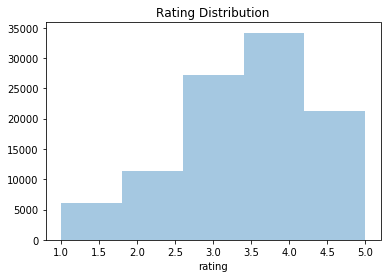

In [18]:
sns.distplot(rawdata['rating'], bins=5, kde=False)
plt.title("Rating Distribution")
plt.show()

As you might expect, ratings are distributed such that a 4 is the most likely response followed by a 3 or a 5.  1's or 2's are rarer and thus probably carry a little more information than a 4.  

## Baseline Model - Random

As our baseline we will use `NormalPredictor`, which simply predicts a random rating based on the distribution of the training set, which is assumed to be normal.

In [31]:
model_baseline = NormalPredictor()
results_baseline = cross_validate(model_baseline, ratingsdata, measures=['RMSE'], cv=5, verbose=False)
m, s = results_baseline['test_rmse'].mean(), 2*results_baseline['test_rmse'].std()
print(f"RMSE Over 5 Folds: {m} +/- {s}")

RMSE Over 5 Folds: 1.519207672078277 +/- 0.01217603577750176


## User-Based Collaborative Filtering

User-based Collaborative Filtering works on the premise that people who rated things similarly in the past will do so in the future.  It makes predictions by averaging the ratings that similar users would have given the item.

In [35]:
model_user = KNNBasic(sim_options={'user_based': True})
results_user = cross_validate(model_user, ratingsdata, measures=['RMSE'], cv=100, verbose=False)
m, s = results_user['test_rmse'].mean(), 2*results_user['test_rmse'].std()
print(f"RMSE Over 5 Folds: {m} +/- {s}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

## Item-Based Collaborative Filtering

Similarly, item-based collaborative filtering makes predictions about items using items which have receieved similar ratings. 

In [36]:
model_item = KNNBasic(sim_options={'user_based': False})
results_item = cross_validate(model_item, ratingsdata, measures=['RMSE'], cv=100, verbose=False)
m, s = results_item['test_rmse'].mean(), 2*results_item['test_rmse'].std()
print(f"RMSE Over 5 Folds: {m} +/- {s}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi